# Fake News Detection
Group Presentation <br>
Using Supervised Learning with tree method in the following
1. Linear Regression
2. Decision Tree
3. Random Forest

###Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

###Import dataset

In [2]:
# df_fake = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/fake_news/Fake.csv')
# df_true = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/fake_news/True.csv')
df_fake = pd.read_csv('../data/input/fake-news-detection/Fake.csv')
df_true = pd.read_csv('../data/input/fake-news-detection/True.csv')

In [3]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
df_true.info(),df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


(None, None)

### Inser a column class as label

In [6]:
df_fake["class"] = 0
df_true["class"] = 1

print(df_fake.shape, df_true.shape)

(23481, 5) (21417, 5)


### Merge true and dake dataframe

In [8]:
df_merge = pd.concat([df_fake, df_true], axis =0 )

df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

### Remove coulmns that are not required

In [9]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [10]:
df.isnull().sum()

text     0
class    0
dtype: int64

### Data Random Suffling

In [11]:
df = df.sample(frac = 1)
df.head(10)

,text,class
19593,It s about time an adult steps up and takes co...,0
12259,BELFAST (Reuters) - A leader of a British far-...,1
21604,Americans need to put American citizens first ...,0
6064,"WASHINGTON (Reuters) - President Donald Trump,...",1
7280,WASHINGTON (Reuters) - Republican President-el...,1
18212,West Virginia Governor Jim Justice gave Trump ...,0
15416,Bernie Sanders is a self described socialist N...,0
17178,"Mark Levin lays out Obama s one-sided, unconst...",0
14657,Thanks to the funding our GOP majority Congres...,0
11209,During her Tuesday interview with MSNBC s Andr...,0


In [54]:
df.columns

Index(['text', 'class'], dtype='object')

In [12]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [56]:
df.columns

Index(['text', 'class'], dtype='object')

In [57]:
df.head()

,text,class
0,This House Republican didn t see this humiliat...,0
1,Climate grifter Al Gore is confronted about gl...,0
2,The Republican presidential candidates have be...,0
3,CAIRO (Reuters) - Egyptian presidential hopefu...,1
4,"In fact, the U.S. Justice Department has been ...",0


### Create function to process the texts

In [13]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
/var/folders/z6/2wz7jxb56936gt0mxv3lscnm0000gn/T/ipykernel_85581/2411212894.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
/var/folders/z6/2wz7jxb56936gt0mxv3lscnm0000gn/T/ipykernel_85581/2411212894.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
/var/folders/z6/2wz7jxb56936gt0mxv3lscnm0000gn/T/ipykernel_85581/2411212894.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [15]:
df['text'] = df['text'].apply(wordopt)

### Defind dependent and independent variable

In [16]:
x = df['text']
y = df['class']

### Data splitting

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Convert from text to vector

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Plot

/Users/rattanak/Documents/machine-learning-tutorial/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


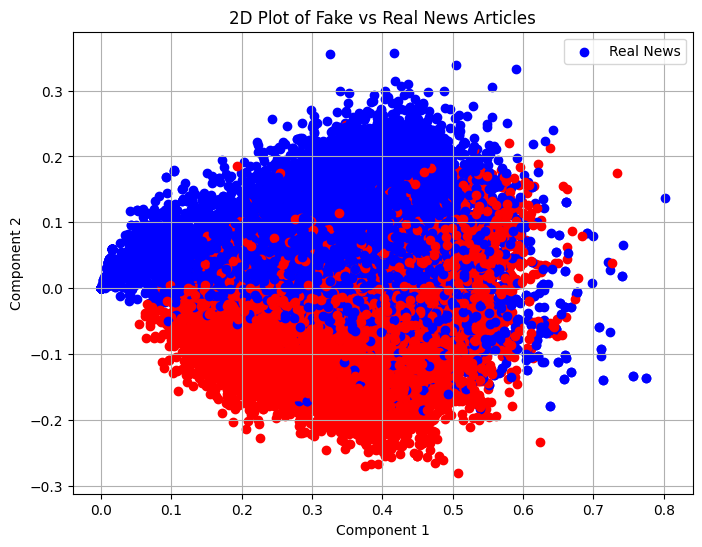

In [24]:
from sklearn.decomposition import TruncatedSVD

# Apply TruncatedSVD to reduce to 2 dimensions
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(xv_train)

# Plotting the articles in 2D space
plt.figure(figsize=(8,6))

# Scatter plot of articles, coloring by label
for i, label in enumerate(y_train):
    if label == 1:
        plt.scatter(X_reduced[i, 0], X_reduced[i, 1], color='red', label='Fake News' if i == 0 else "")
    else:
        plt.scatter(X_reduced[i, 0], X_reduced[i, 1], color='blue', label='Real News' if i == 0 else "")

plt.title('2D Plot of Fake vs Real News Articles')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()

## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [64]:
predition = LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9865256124721603

In [65]:
print(classification_report(y_test, predition))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4683
           1       0.98      0.99      0.99      4297

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [67]:
prediction = RFC.predict(xv_test)
RFC.score(xv_test, y_test)

0.9881959910913141

In [68]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4683
           1       0.99      0.99      0.99      4297

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



## Decision Tree Classification

In [69]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(xv_train, y_train)

DecisionTreeClassifier()

In [70]:
prediction = DTC.predict(xv_test)
DTC.score(xv_test, y_test)

0.9971046770601336

In [71]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4683
           1       1.00      1.00      1.00      4297

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



## Model Testing

In [72]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_DTC = DTC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nRF Prediction: {} \nDT Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                         output_lable(pred_RFC[0]),
                                                                                         output_lable(pred_DTC[0])
                                                                                         ))

In [73]:
# news = str(input())
news = "Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."
manual_testing(news)




LR Prediction: Fake News 
RF Prediction: Fake News 
DT Prediction: Fake News


In [74]:
# Save model
import pickle
# from keras.models import Model, load_model
pickle.dump(LR, open('LR.pkl', 'wb'))
pickle.dump(RFC, open('RFC.pkl', 'wb'))
pickle.dump(DTC, open('DT.pkl', 'wb'))

In [75]:
# Save vectorizer
pickle.dump(vectorization, open('vectorization.pkl', 'wb'))

In [76]:
with open('LR.pkl', 'rb') as file:
    LR_MODEL = pickle.load(file)
    
def manual_testing(news, model):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    # pred_LR = LR.predict(new_xv_test)
    # pred_RFC = RFC.predict(new_xv_test)
    # pred_DTC = DTC.predict(new_xv_test)
    result = model.predict(new_xv_test)
    print(output_lable(result[0]))

manual_testing(news=news, model=LR_MODEL)


Fake News


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
# xv_train = vectorization.fit_transform(x_train)
# xv_test = vectorization.transform(x_test)

with open('LR.pkl', 'rb') as file:
    LR_MODEL = pickle.load(file)

with open('vectorization.pkl', 'rb') as file:
    VECTORIZER = pickle.load(file)
    
def manual_testing(news, model):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = VECTORIZER.transform(new_x_test)
    # pred_LR = LR.predict(new_xv_test)
    # pred_RFC = RFC.predict(new_xv_test)
    # pred_DTC = DTC.predict(new_xv_test)
    result = model.predict(new_xv_test)
    print(output_lable(result[0]))

manual_testing(news=news, model=LR_MODEL)

Fake News
